- simple evolution strategy, 100 000 evaluations, single mutation
- max_back=20

In [8]:
import random

import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

import tengp
import symreg
from gpbenchmarks import get_data

from experiment_settings import nguyen7_funset, pagie_funset, keijzer_funset, korns12_funset, vlad_funset

def plot_results(name, outs):
    print(name)
    costs = np.array(outs)
    print('min:', np.min(costs))
    print('mean:', np.mean(costs))
    print('median:', np.median(costs))
    print('variance:',np.var(costs))
    plt.figure()
    plt.title(name)
    sns.distplot(costs, kde=False);
    

def run_experiment(data_item, cost_function):
    results = []
    genes = []
    
    name, (x_train, y_train, x_test, y_test), params = data_item
    x_train = np.c_[x_train, np.ones(len(x_train))]
    print(name)
    
    bounds = tengp.individual.IndividualBuilder(params).create().bounds[:]
    
    random.seed(42)
    
    for i in range(100):
        print(i, end=',')
        
        res = tengp.simple_es(x_train, y_train, cost_function, params, evaluations=100000, mutation='single')
        
        results.append(res[0].fitness)
        genes.append(res[0].genes)
    
    return results, genes

In [12]:
import pickle

In [36]:
kw_params = {'real_valued': False, 'max_back': 20}

params_nguyen4 = tengp.Parameters(2, 1, 1, 50, nguyen7_funset, **kw_params)
params_nguyen7 = tengp.Parameters(2, 1, 1, 50, nguyen7_funset, **kw_params)
params_nguyen10 = tengp.Parameters(3, 1, 1, 50, nguyen7_funset, **kw_params)
params_pagie1  = tengp.Parameters(2, 1, 1, 50, pagie_funset, **kw_params)
params_keijzer6 = tengp.Parameters(2, 1, 1, 50, keijzer_funset, **kw_params)
params_korns = tengp.Parameters(6, 1, 1, 50, korns12_funset, **kw_params)
params_vlad = tengp.Parameters(5, 1, 1, 50, vlad_funset, **kw_params)

all_params = [params_nguyen7, params_pagie1, params_keijzer6, params_korns, params_vlad]

In [3]:
data = [
    ('nguyen4', symreg.get_benchmark_poly(random, 6), params_nguyen4),
    ('nguyen7', symreg.get_benchmark_nguyen7(random, None), params_nguyen7),
    ('nguyen10', symreg.get_benchmark_nguyen10(random, None), params_nguyen10),
    ('pagie1', symreg.get_benchmark_pagie1(random, None), params_pagie1),
    ('keijzer6', symreg.get_benchmark_keijzer(random, 6), params_keijzer6),
    ('korns12', symreg.get_benchmark_korns(random, 12), params_korns),
    ('vladislasleva4', symreg.get_benchmark_vladislasleva4(random, None), params_vlad)
]

# Nguyen 4

In [37]:
%%time

ng4_res, ng4_genes = run_experiment(data[0], mean_squared_error)

nguyen4
0,

/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return np.divide(x, y, out=np.copy(x), where=x!=0)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:14: RuntimeWarning: invalid value encountered in sin
  return np.sin(x)
/home/jarino/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:160: RuntimeWarning: invalid value encountered in multiply
  
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:11: RuntimeWarning: invalid value encountered in greater
  return np.log(x, out=np.copy(x), where=x>0)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:17: RuntimeWarning: invalid value encountered in cos
  return np.cos(x)
/mnt/c/Users/j

KeyboardInterrupt: 

In [13]:
pickle.dump(ng4_res, open('ng4_res_100_000evals', 'wb'))
pickle.dump(ng4_genes, open('ng4_genes_100_000evals', 'wb'))

nguyen4
min: 2.0511153907724063e-33
mean: 0.00964724338614061
median: 0.004959768055172649
variance: 0.00014533798051469672


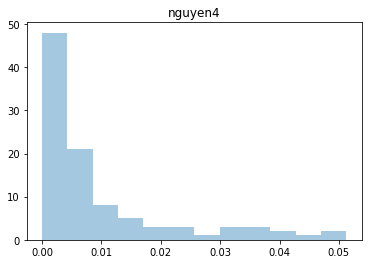

In [10]:
plot_results('nguyen4', ng4_res)

# Nguyen 7


In [15]:
%%time

ng7_res, ng7_genes = run_experiment(data[1], mean_squared_error)

nguyen7
0,

/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return np.divide(x, y, out=np.copy(x), where=x!=0)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:14: RuntimeWarning: invalid value encountered in sin
  return np.sin(x)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:17: RuntimeWarning: invalid value encountered in cos
  return np.cos(x)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:160: RuntimeWarning: invalid value encountered in add
  current_node.value = current_node.fun(*values)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:160: RuntimeWarning: invalid value encountered in subtract
  current_node.value = current_node.fun(*values)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:160: RuntimeWarning: invalid value encountered in multiply
  current_node.value = current_node.fun(*values)
/mnt/c

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:160: RuntimeWarning: overflow encountered in multiply
  current_node.value = current_node.fun(*values)


78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,CPU times: user 1h 2min 23s, sys: 1.78 s, total: 1h 2min 25s
Wall time: 1h 2min 31s


In [16]:
pickle.dump(ng7_res, open('ng7_res_100_000evals', 'wb'))
pickle.dump(ng7_genes, open('ng7_genes_100_000evals', 'wb'))

nguyen7
min: 8.922135873523213e-06
mean: 0.0013213470612405789
median: 0.00040277629911668046
variance: 6.000968832777179e-06


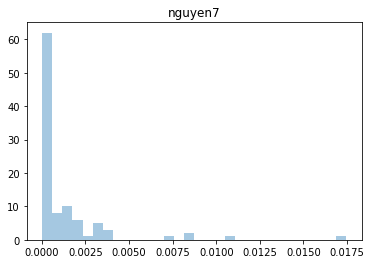

In [17]:
plot_results('nguyen7', ng7_res)

# Nguyen 10

In [18]:
%%time

ng10_res, ng10_genes = run_experiment(data[2], mean_squared_error)

nguyen10
0,

/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return np.divide(x, y, out=np.copy(x), where=x!=0)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:160: RuntimeWarning: invalid value encountered in subtract
  current_node.value = current_node.fun(*values)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:14: RuntimeWarning: invalid value encountered in sin
  return np.sin(x)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:17: RuntimeWarning: invalid value encountered in cos
  return np.cos(x)
/home/jarino/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:160: RuntimeWarning: invalid value encountered in multiply
  current_node.value = current_node.f

1,

/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:11: RuntimeWarning: invalid value encountered in greater
  return np.log(x, out=np.copy(x), where=x>0)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:8: RuntimeWarning: invalid value encountered in true_divide
  return np.divide(x, y, out=np.copy(x), where=x!=0)


2,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:160: RuntimeWarning: invalid value encountered in add
  current_node.value = current_node.fun(*values)


3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,

/home/jarino/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:239: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,CPU times: user 1h 8s, sys: 1.98 s, total: 1h 10s
Wall time: 1h 11s


In [19]:
pickle.dump(ng10_res, open('ng10_res_100_000evals', 'wb'))
pickle.dump(ng10_genes, open('ng10_genes_100_000evals', 'wb'))

nguyen10
min: 0.0
mean: 2.116761668274629
median: 0.0010814073925943016
variance: 417.69499295088576


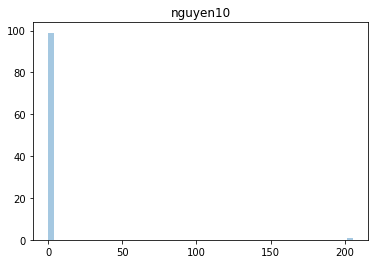

In [20]:
plot_results(data[2][0], ng10_res)

# Pagie

In [23]:
%%time

pag1_res, pag1_genes = run_experiment(data[3], mean_squared_error)

pagie1
0,

/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:35: RuntimeWarning: invalid value encountered in sqrt
  return  np.sqrt(x)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:160: RuntimeWarning: invalid value encountered in power
  current_node.value = current_node.fun(*values)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:11: RuntimeWarning: invalid value encountered in greater
  return np.log(x, out=np.copy(x), where=x>0)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return np.divide(x, y, out=np.copy(x), where=x!=0)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:41: RuntimeWarning: divide by zero encountered in reciprocal
  return x**(-1)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:160: RuntimeWarning: overflow encountered in power
  current_node.value = current_n

1,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:160: RuntimeWarning: overflow encountered in add
  current_node.value = current_node.fun(*values)


2,3,4,

/home/jarino/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/jarino/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


5,6,7,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:160: RuntimeWarning: overflow encountered in subtract
  current_node.value = current_node.fun(*values)


8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,CPU times: user 1h 27min 27s, sys: 406 ms, total: 1h 27min 28s
Wall time: 1h 27min 36s


In [24]:
pickle.dump(pag1_res, open('pag1_res_100_000evals', 'wb'))
pickle.dump(pag1_genes, open('pag1_genes_100_000evals', 'wb'))

pagie1
min: 0.0003164489707489443
mean: 0.08039999189171866
median: 0.06666707487995785
variance: 0.004056783659039


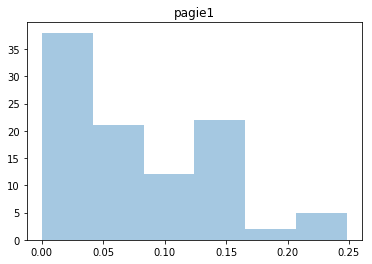

In [25]:
plot_results(data[3][0], pag1_res)

# Keijzer 6

keijzer6
0,

/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:41: RuntimeWarning: divide by zero encountered in reciprocal
  return x**(-1)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:160: RuntimeWarning: invalid value encountered in multiply
  current_node.value = current_node.fun(*values)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:35: RuntimeWarning: invalid value encountered in sqrt
  return  np.sqrt(x)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:11: RuntimeWarning: invalid value encountered in greater
  return np.log(x, out=np.copy(x), where=x>0)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:17: RuntimeWarning: invalid value encountered in cos
  return np.cos(x)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:14: RuntimeWarning: invalid value encountered in sin
  return np.sin(x)
/home/jarino/anaconda3/li

1,2,3,4,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:160: RuntimeWarning: invalid value encountered in add
  current_node.value = current_node.fun(*values)


5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,keijzer6
min: 2.882884072193754e-06
mean: 0.0025408093647570516
median: 0.0007367446888942926
variance: 2.858917369113897e-05
CPU times: user 57min 26s, sys: 1.28 s, total: 57min 27s
Wall time: 57min 27s


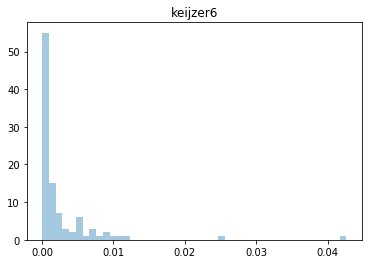

In [26]:
%%time

kei6_res, kei6_genes = run_experiment(data[4], mean_squared_error)

pickle.dump(kei6_res, open('kei6_res_100_000evals', 'wb'))
pickle.dump(kei6_genes, open('kei6_genes_100_000evals', 'wb'))

plot_results(data[4][0], kei6_res)

# Korns 12

In [31]:
%%time

korns12_res, korns12_genes = run_experiment(data[5], mean_squared_error)

pickle.dump(korns12_res, open('korns12_res_100_000evals', 'wb'))
pickle.dump(korns12_genes, open('korns12_genes_100_000evals', 'wb'))

korns12
0,

/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:35: RuntimeWarning: invalid value encountered in sqrt
  return  np.sqrt(x)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:11: RuntimeWarning: invalid value encountered in greater
  return np.log(x, out=np.copy(x), where=x>0)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return np.divide(x, y, out=np.copy(x), where=x!=0)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:38: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:160: RuntimeWarning: invalid value encountered in multiply
  current_node.value = current_node.fun(*values)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:29: RuntimeWarning: invalid value encountered in tan
  return np.t

1,2,

/home/jarino/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


3,4,5,6,7,

KeyboardInterrupt: 

In [ ]:
plot_results(data[5][0], korns12_res)

# Vladislasleva 4

In [35]:
%%time

vlad4_res, vlad4_genes = run_experiment(data[6], mean_squared_error)

pickle.dump(vlad4_res, open('vlad4_res_100_000evals', 'wb'))
pickle.dump(vlad4_genes, open('vlad4_genes_100_000evals', 'wb'))

vladislasleva4
0,

/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:38: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:35: RuntimeWarning: invalid value encountered in sqrt
  return  np.sqrt(x)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:160: RuntimeWarning: invalid value encountered in power
  
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:11: RuntimeWarning: invalid value encountered in greater
  return np.log(x, out=np.copy(x), where=x>0)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:160: RuntimeWarning: overflow encountered in power
  
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:14: RuntimeWarning: invalid value encountered in sin
  return np.sin(x)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:8: RuntimeWarning: divide by zero encountered 

KeyboardInterrupt: 

vladislasleva4
min: 0.007551629849109891
mean: 0.026620757748613236
median: 0.026921176319823513
variance: 5.4825851060376263e-05


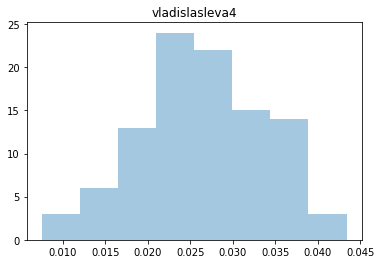

In [29]:
plot_results(data[6][0], vlad4_res)

# Rounding of results

In [ ]:
rounded_results = []

chunk = 100
for i, (name, (x_train, y_train, x_test, y_test), params) in zip(range(5), data):
    problem_results = []
    
    x_train = np.c_[x_train, np.ones(len(x_train))]
        
    bounds = tengp.individual.IndividualBuilder(params).create().bounds
    
    print(name)
    
    for genes in champions[chunk*i:chunk*i + chunk]:
        
        individual = params.individual_class(np.round(genes), bounds, params)
        
        output = individual.transform(x_train)
        
        try:
            problem_results.append(mean_squared_error(output, y_train))
        except ValueError:
            print('value error')
    
    rounded_results.append(problem_results)
        
        

In [ ]:
np.min(rounded_results[4])